In [3]:
import matplotlib.pyplot as plt
from fns import * 
# a module that contains all the required functions 
# that generate graph 1 of https://arxiv.org/abs/1808.08927

In [9]:
primes = []
for i in range(20, 340):
    if is_prime(i):
        primes.append(i)
biprimes = []
for i in range(len(primes)):
    for j in range(i + 1, len(primes)):
        if i != j:
            biprimes.append(primes[i] * primes[j])
#print(biprimes)

[667, 713, 851, 943, 989, 1081, 1219, 1357, 1403, 1541, 1633, 1679, 1817, 1909, 2047, 2231, 2323, 2369, 2461, 2507, 2599, 2921, 3013, 3151, 3197, 3427, 3473, 3611, 3749, 3841, 3979, 4117, 4163, 4393, 4439, 4531, 4577, 4853, 5129, 5221, 5267, 5359, 5497, 5543, 5773, 5911, 6049, 6187, 6233, 6371, 6463, 6509, 6739, 7061, 7153, 7199, 7291, 7613, 7751, 899, 1073, 1189, 1247, 1363, 1537, 1711, 1769, 1943, 2059, 2117, 2291, 2407, 2581, 2813, 2929, 2987, 3103, 3161, 3277, 3683, 3799, 3973, 4031, 4321, 4379, 4553, 4727, 4843, 5017, 5191, 5249, 5539, 5597, 5713, 5771, 6119, 6467, 6583, 6641, 6757, 6931, 6989, 7279, 7453, 7627, 7801, 7859, 8033, 8149, 8207, 8497, 8903, 9019, 9077, 9193, 9599, 9773, 1147, 1271, 1333, 1457, 1643, 1829, 1891, 2077, 2201, 2263, 2449, 2573, 2759, 3007, 3131, 3193, 3317, 3379, 3503, 3937, 4061, 4247, 4309, 4619, 4681, 4867, 5053, 5177, 5363, 5549, 5611, 5921, 5983, 6107, 6169, 6541, 6913, 7037, 7099, 7223, 7409, 7471, 7781, 7967, 8153, 8339, 8401, 8587, 8711, 8773, 908

In [10]:
biprimes_final = []
number_of_qubits = []
for i in range(len(biprimes)):
    num_variables = num_variables_final(biprimes[i])
    #print(num_variables)
    biprimes_final.append(biprimes[i])
    number_of_qubits.append(num_variables)

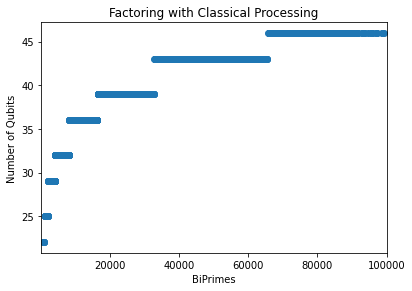

In [25]:
a = plt.figure()
axes = a.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlim([2, 100000])
#axes.set_ylim([0, 140])
axes.scatter(biprimes, number_of_qubits)
plt.title('Factoring with Classical Processing')
plt.xlabel('BiPrimes')
plt.ylabel('Number of Qubits')
plt.show()